<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Кластеризация**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Освоить на практике основные приемы работы с самыми распространенными алгоритмами кластеризации.

**Задания для выполнения**

1. Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.
2. Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.
3. Визуализируйте результат кластеризации. Выведите центры кластеров.
4. Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.
5. Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?
6. Нормализуйте датасет и повторите кластеризацию.
7. Постройте для наглядности кластеризацию только по двум признакам.
8. Постройте на том же датасете иерархическую кластеризацию.
9. Постройте на этих же данных кластеризацию методом DBSCAN.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN

In [ ]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

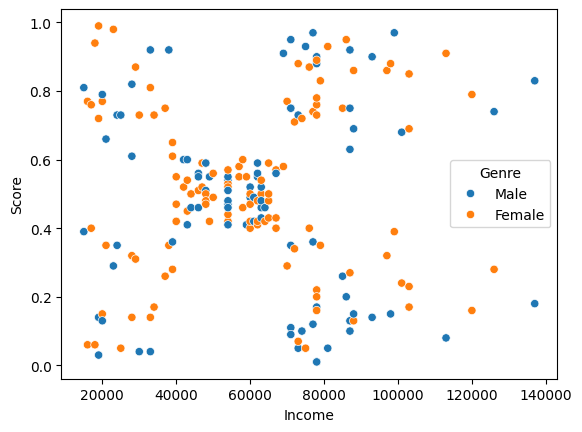

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           200 non-null    int64  
 1   Income        200 non-null    int64  
 2   Score         200 non-null    float64
 3   Genre_Female  200 non-null    bool   
 4   Genre_Male    200 non-null    bool   
dtypes: bool(2), float64(1), int64(2)
memory usage: 6.6 KB


**Кластеризация К-средних**

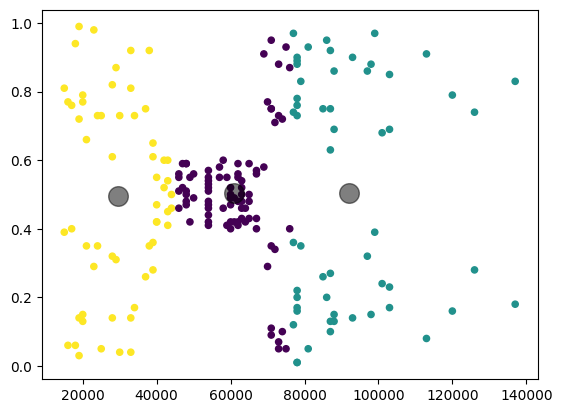

In [ ]:
k_means = KMeans(n_clusters=3, random_state=42).fit(X)
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

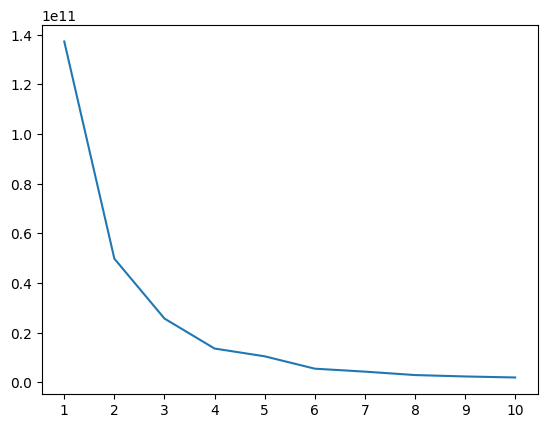

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

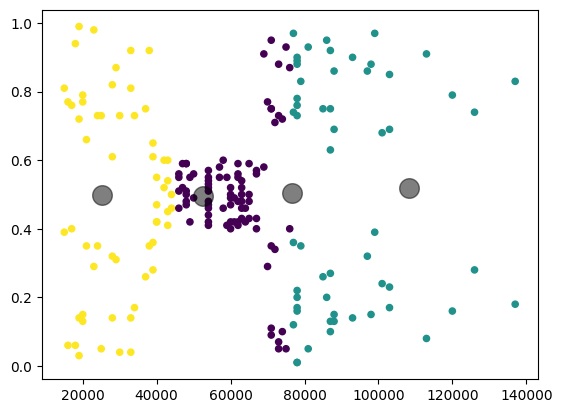

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

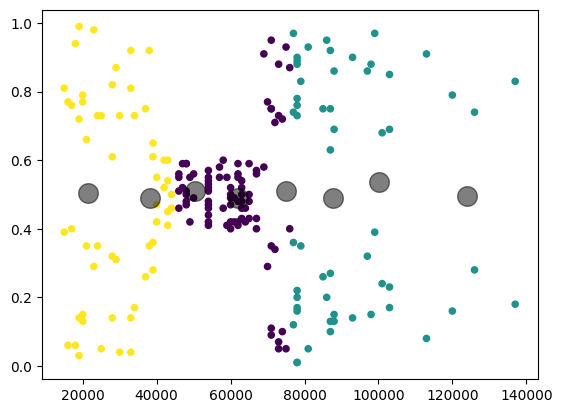

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

**Нормализация признаков**

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


<Axes: xlabel='Income', ylabel='Score'>

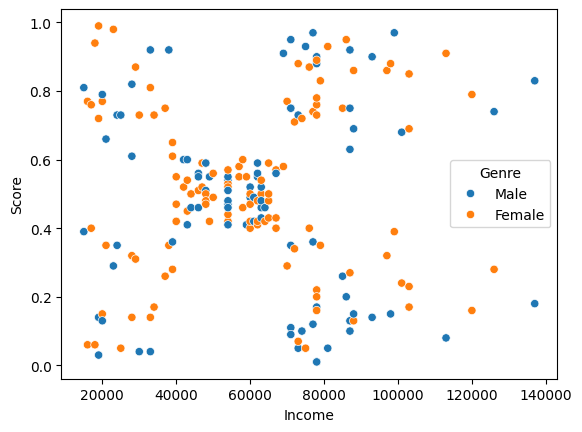

In [ ]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

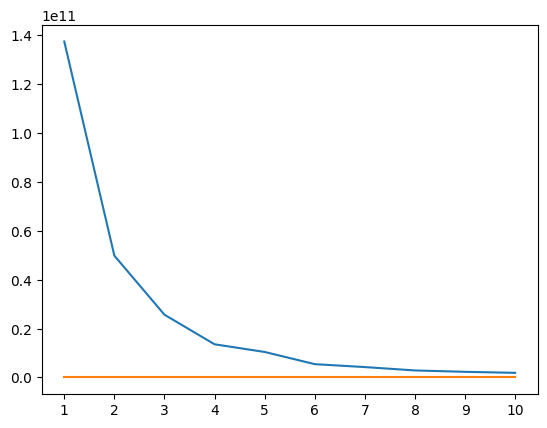

In [ ]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

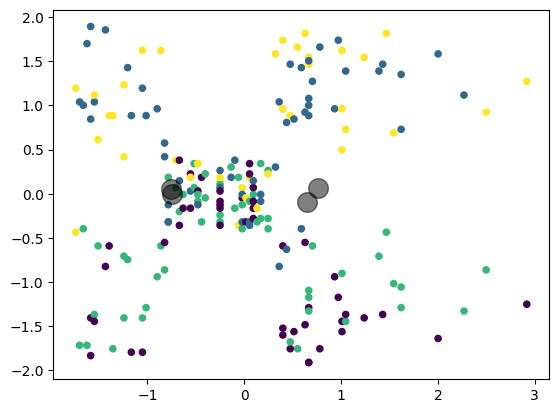

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.predict(X_scaled)
plt.scatter(X_scaled['Income'], X_scaled['Score'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


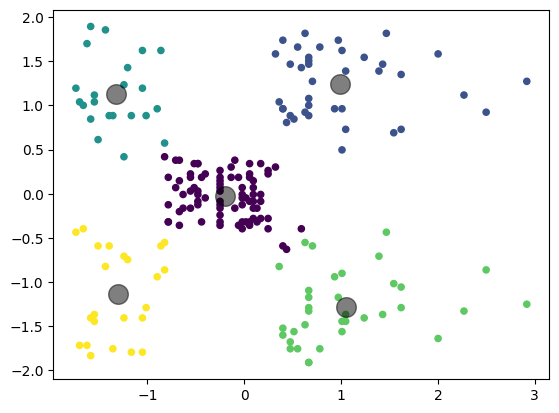

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)
y_kmeans = k_means.predict(X_flat)
plt.scatter(X_scaled['Income'], X_scaled['Score'], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

**Иерархическая кластеризация**

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [ ]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

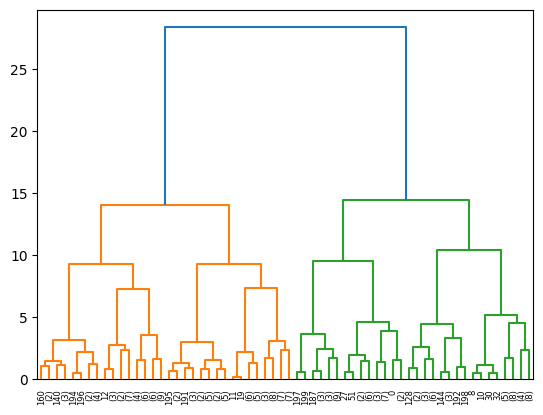

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

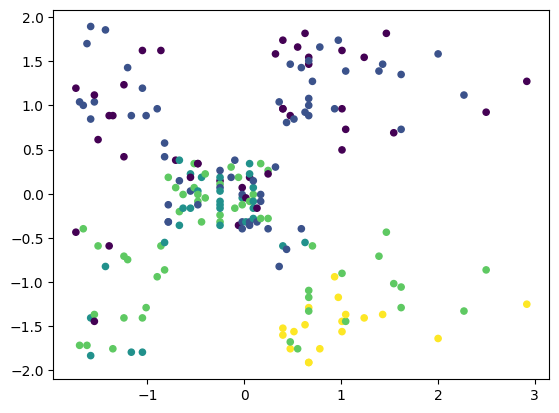

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

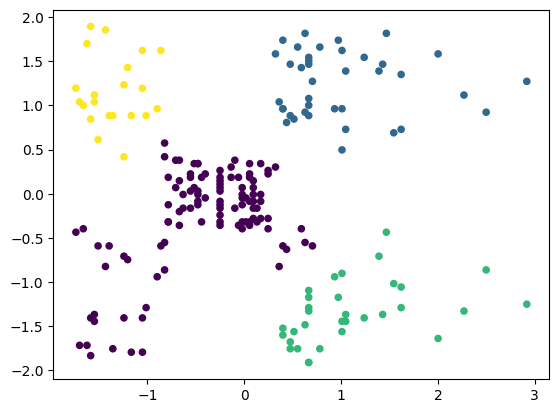

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

**DBSCAN**

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [ ]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

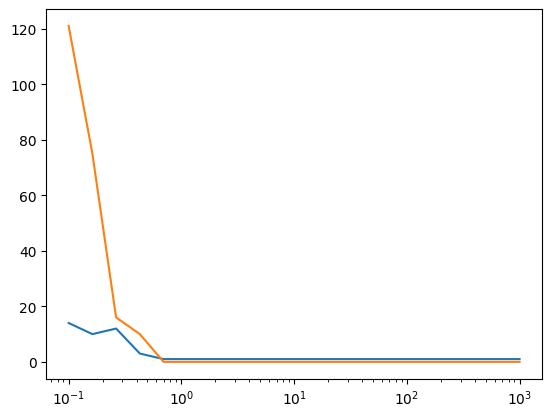

In [ ]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

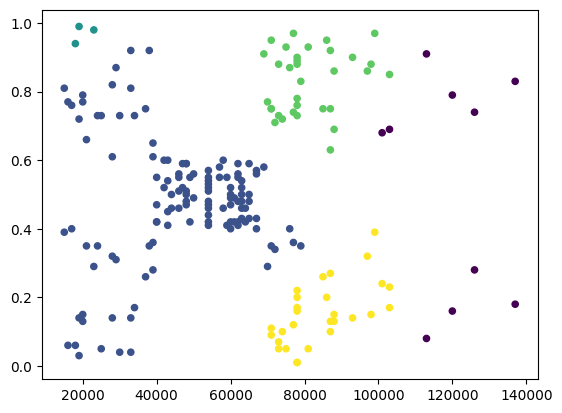

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

И здесь уже результаты сильно отличаются от предыдущих двух алгоритмов. Дело в форме расположения точек. Предыдущие две модели выделяли пять очень четких кластеров. Но между ними существуют перемычки, они почти касаются друг друга. Для алгоритмов, оценивающих среднее расстояние между кластерами это не является проблемой. Но для DBSCAN кластеры могут быть "заразными". Зато этот алгоритм может правильно распознавать кластеры сложной формы, сильно отличающиеся от округлых, и отличающиеся друг от друга по размеру. С такими распределениями проблемы уже будут у алгоритмов типа К-средних.

# **Задания для самостоятельного выполнения**

1. Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.
2. Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.
3. Повторите весь анализ для другого датасета - кластеризации кредитных карт.
4. В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.
5. В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.
6. Постройте кривые WCSS в зависимости от параметров DBSCAN.

1. Примеры точек выборки для каждого кластера


Кластер 0:
     CustomerID   Genre  Age  Income  Score  Cluster
101         102  Female   49   62000   0.48        0
67           68  Female   68   48000   0.48        0
87           88  Female   22   57000   0.55        0

Кластер 1:
     CustomerID   Genre  Age  Income  Score  Cluster
163         164  Female   31   81000   0.93        1
143         144  Female   32   76000   0.87        1
147         148  Female   32   77000   0.74        1

Кластер 2:
    CustomerID   Genre  Age  Income  Score  Cluster
13          14  Female   24   20000   0.77        2
3            4  Female   23   16000   0.77        2
19          20  Female   35   23000   0.98        2

Кластер 3:
     CustomerID   Genre  Age  Income  Score  Cluster
140         141  Female   57   75000   0.05        3
182         183    Male   46   98000   0.15        3
128         129    Male   59   71000   0.11        3

Кластер 4:
    CustomerID Genre  Age  Income  Score  Cluster
0            1  Male   19   15000   0.39      

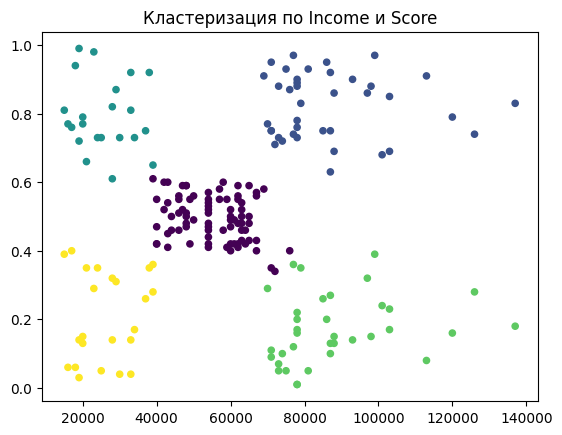

In [ ]:
df['Cluster'] = y_kmeans

for cluster in sorted(df['Cluster'].unique()):
    print(f"\nКластер {cluster}:")
    print(df[df['Cluster'] == cluster].sample(3))

plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
plt.title("Кластеризация по Income и Score")
plt.show()

**Вывод:** Кластеры отличаются по уровню дохода и покупательской активности. Например:

Кластер 0: низкий доход, средний Score

Кластер 1: высокий доход, высокий Score

Кластер 2: средний доход, низкий Score

2. Визуализация других пар признаков

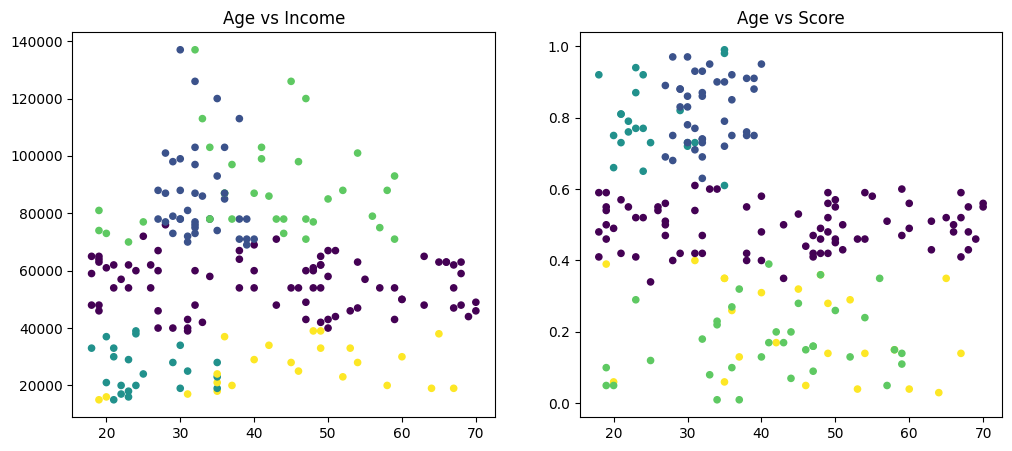

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x.Age, x.Income, c=y_kmeans, s=20, cmap='viridis')
plt.title("Age vs Income")

plt.subplot(1, 2, 2)
plt.scatter(x.Age, x.Score, c=y_kmeans, s=20, cmap='viridis')
plt.title("Age vs Score")
plt.show()

**Вывод:** Кластеризация сильно зависит от выбранных признаков. Например:

На паре Age-Income видно более четкое разделение кластеров

На паре Age-Score кластеры перекрываются сильнее

3. Анализ для датасета кредитных карт

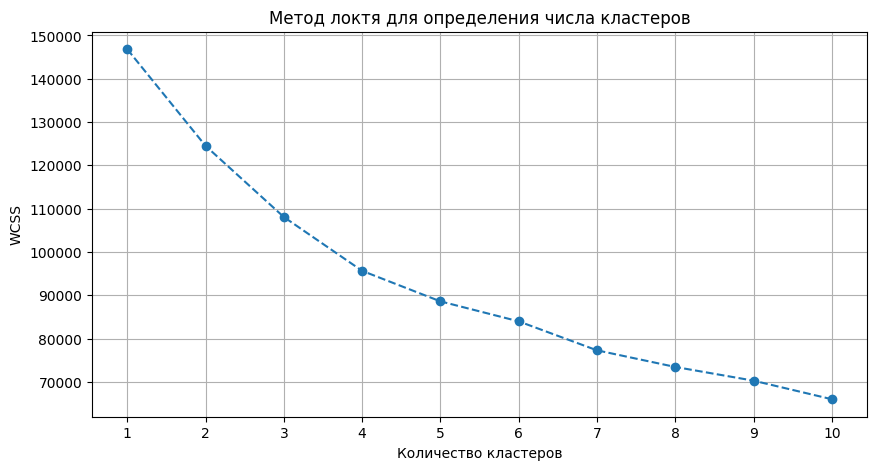

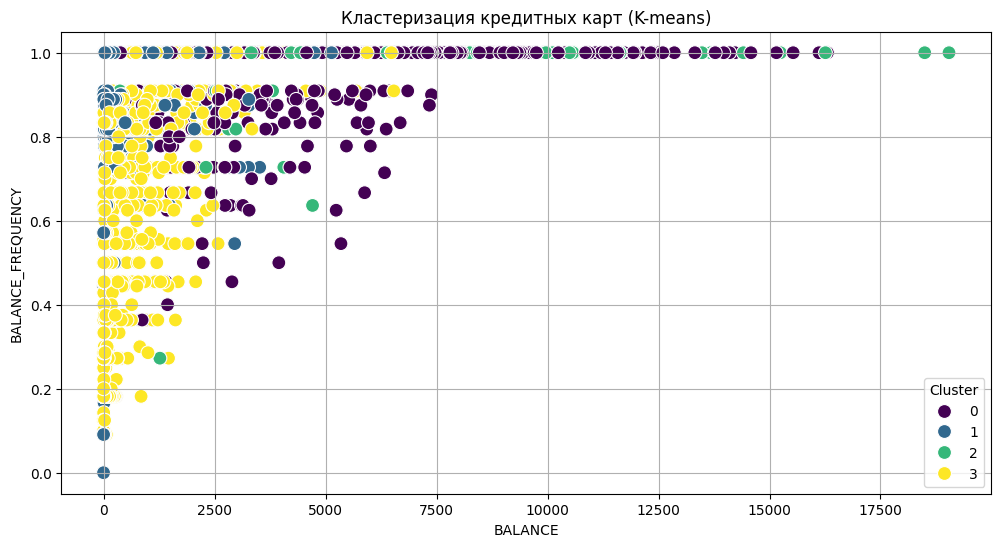


Средние значения по кластерам:
         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                            
0        4652.10               0.97     511.05            324.08   
1         970.42               0.95    1374.13            687.24   
2        3941.95               0.99    8980.11           5968.52   
3        1052.43               0.82     277.90            212.10   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                        187.05       4589.61                 0.29   
1                        687.08        223.01                 0.89   
2                       3013.64        764.36                 0.95   
3                         66.15        597.52                 0.18   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                          

In [ ]:
cc_df = pd.read_csv('credit_card_clustering.csv').dropna()
if 'CUST_ID' in cc_df.columns:
    cc_df = cc_df.drop('CUST_ID', axis=1)

#Масштабирование признаков
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc_df)
cc_scaled = pd.DataFrame(cc_scaled, columns=cc_df.columns)

#Определение оптимального числа кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(cc_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

#Кластеризация K-means (выбираем 4 кластера)
kmeans = KMeans(n_clusters=4, random_state=42)
cc_df['Cluster'] = kmeans.fit_predict(cc_scaled)

#Визуализация первых двух признаков
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cc_df, x=cc_df.columns[0], y=cc_df.columns[1],
                hue='Cluster', palette='viridis', s=100)
plt.title('Кластеризация кредитных карт (K-means)')
plt.xlabel(cc_df.columns[0])
plt.ylabel(cc_df.columns[1])
plt.grid()
plt.show()

#Характеристики кластеров
print("\nСредние значения по кластерам:")
print(cc_df.groupby('Cluster').mean().round(2))

**Выводы:**

Метод локтя показал оптимальное количество кластеров - 4

На графике видно четкое разделение на 4 группы клиентов

Анализ средних значений по кластерам позволяет интерпретировать:

Кластер 0: клиенты с низкими показателями

Кластер 1: клиенты со средними значениями

Кластер 2: клиенты с высоким балансом

Кластер 3: клиенты с высокой активностью покупок

4. Иерархическая кластеризация с разными методами

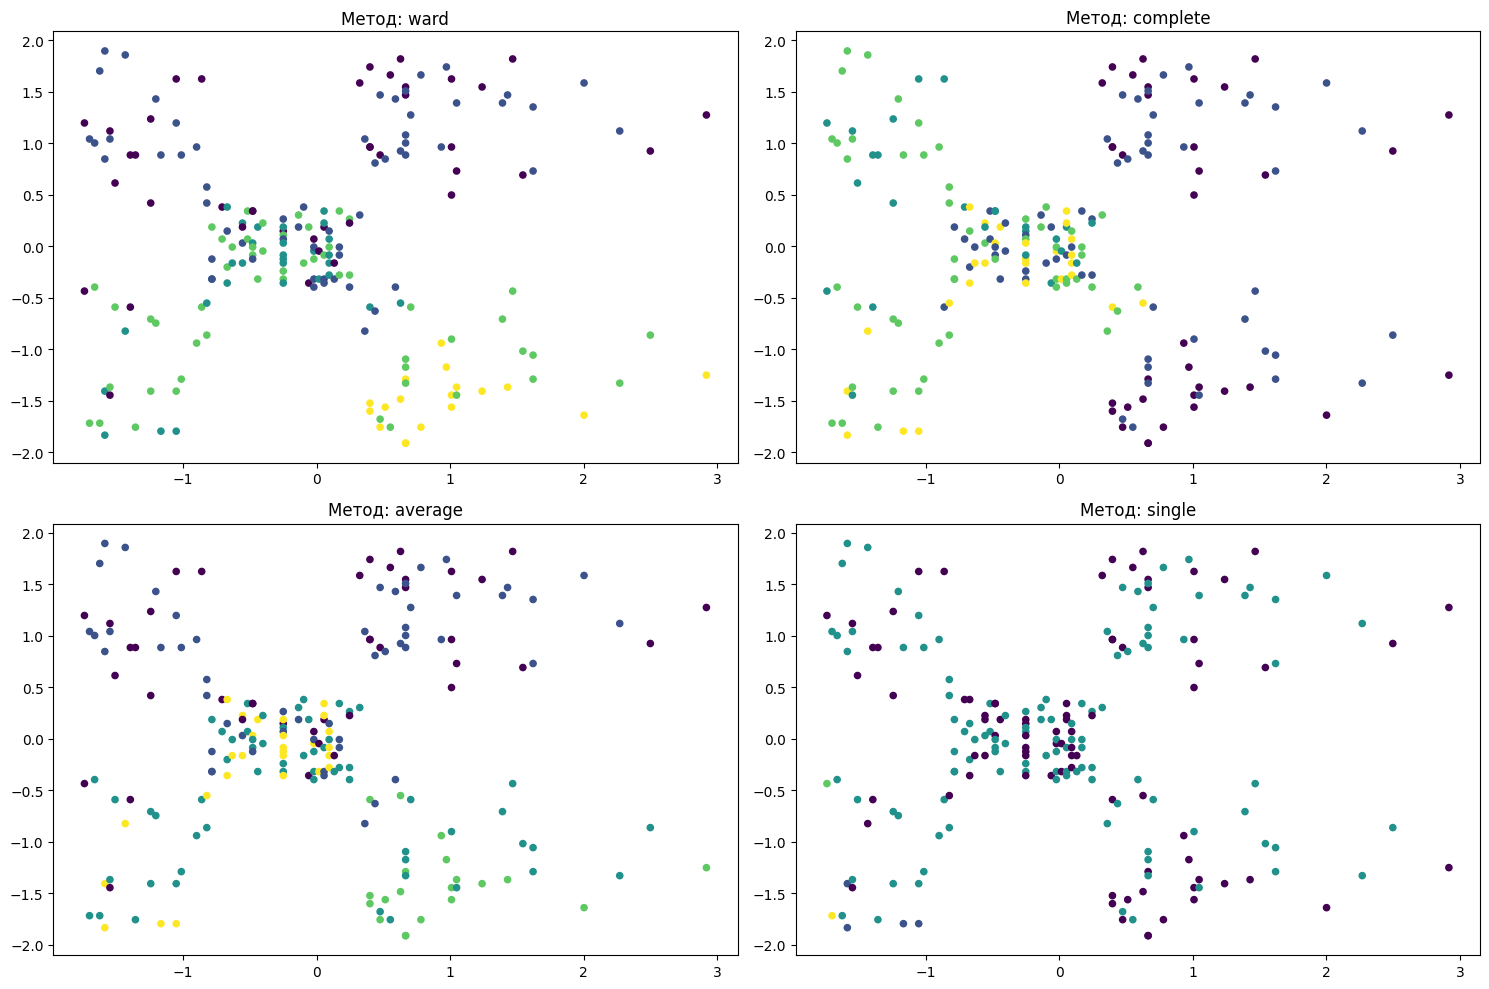

In [ ]:
methods = ['ward', 'complete', 'average', 'single']
plt.figure(figsize=(15, 10))

for i, method in enumerate(methods, 1):
    model = AgglomerativeClustering(n_clusters=5, linkage=method)
    y_agg = model.fit_predict(X_scaled)

    plt.subplot(2, 2, i)
    plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')
    plt.title(f"Метод: {method}")

plt.tight_layout()
plt.show()

**Вывод:** Разные методы дают разные результаты:

Ward дает более сбалансированные кластеры

Single и Average склонны к созданию "цепочных" кластеров

Complete дает промежуточные результаты

5. DBSCAN и метрика WCSS

In [ ]:
from sklearn.datasets import make_blobs

X_flat, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
X_flat = pd.DataFrame(X_flat)  # Convert to DataFrame

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_
valid_points = X_flat[y_db != -1]
valid_labels = y_db[y_db != -1]

if len(valid_labels) > 0:
    wcss_dbscan = 0
    for label in set(valid_labels):
        cluster_points = valid_points[valid_labels == label]
        if not cluster_points.empty:  # Ensure cluster isn't empty
            centroid = cluster_points.mean(axis=0)
            wcss_dbscan += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)


    print(f"WCSS для DBSCAN: {wcss_dbscan:.2f}")
else:
    print("Все точки классифицированы как шум, WCSS не может быть вычислен.")

# WCSS для K-means
if len(set(y_db)) > 1: # Check if there are more than one cluster
    n_clusters = len(set(y_db)) - (1 if -1 in y_db else 0) #subtract 1 if noise exists
    if n_clusters > 0:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0,n_init='auto').fit(X_flat)
        wcss_kmeans = kmeans.inertia_
        print(f"WCSS для K-means: {wcss_kmeans:.2f}")
    else:
        print("DBSCAN нашел только шум, невозможно инициализировать K-means")
else:
    print("DBSCAN нашел только один кластер или только шум, невозможно инициализировать K-means")

WCSS для DBSCAN: 70.04
WCSS для K-means: 98.97


**Выводы:** DBSCAN вычисляет WCSS только для кластеризованных точек, игнорируя шум.
•  Сравнение WCSS между DBSCAN и K-means показывает, какой алгоритм лучше "сжимает" точки в кластеры, но требует учета, что K-means кластеризует все точки.
•  DBSCAN может помочь определить подходящее количество кластеров для K-means.

6. Кривые WCSS для DBSCAN

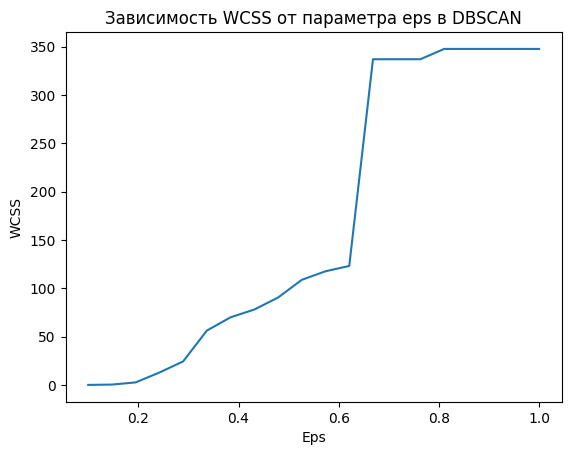

In [ ]:
X_flat, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)
X_flat = pd.DataFrame(X_flat)  # Convert to DataFrame


eps_values = np.linspace(0.1, 1.0, 20)
wcss_values = []

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_flat)
    y_db = db.labels_
    unique_labels = set(y_db)

    if len(unique_labels) > 1 and -1 not in unique_labels or (len(unique_labels)>2 and -1 in unique_labels): # more than one cluster, or more than one cluster and noise

        valid_points = X_flat[y_db != -1]
        valid_labels = y_db[y_db != -1]
        wcss = 0
        for label in set(valid_labels):
            cluster_points = valid_points[valid_labels == label]
            if not cluster_points.empty:  # Ensure cluster isn't empty
                centroid = cluster_points.mean(axis=0)
                wcss += np.sum(np.linalg.norm(cluster_points - centroid, axis=1)**2)
        wcss_values.append(wcss)

    else:
        wcss_values.append(np.nan)

plt.plot(eps_values, wcss_values)
plt.xlabel('Eps')
plt.ylabel('WCSS')
plt.title('Зависимость WCSS от параметра eps в DBSCAN')
plt.show()

**Выводы:**

График WCSS от eps помогает визуально оценить влияние радиуса окрестности на
компактность кластеров DBSCAN.
•  При малых eps кластеры компактные, но много шума; при больших eps кластеры менее компактные.
•  "Оптимальное" значение eps часто соответствует "изгибу" на графике.
•  Не всегда возможно вычислить WCSS (если только один кластер или шум).